tensorflow.org
https://www.tensorflow.org/alpha

- public for tensorflow 2.0 alpha version

THIS LESSON: LOADING DATA
 - build image input pipeline


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os #operating system
print(os.listdir("../input")) #location of the data

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'train_images', 'test_images']


In [2]:
#df = pd.read_csv('train.csv') #trying to read the train data of this data set
#'train.csv' exist as it says but the reason we cannot find it is that . and .. is different
df=pd.read_csv('../input/train.csv') #df = data frame

#to see what is inside of df 
df.head() #to see the first five data 

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,19,2011-05-13 23:43:18,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,19,2012-03-17 03:48:44,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,0,2014-05-11 11:56:46,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,0,2013-10-06 02:00:00,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,0,2011-07-12 13:11:16,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747


This tutorial provides a simple example of how to load an image dataset using tf.data.

The dataset used in this example is distributed as directories of images, with one class of image per directory.

Put all all the id numbers in one category and train??

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0 #downloading tensorflow alpha
import tensorflow as tf

## from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0 #downloading tensorflow alpha
import tensorflow as tf

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [5]:
id = df['category_id'] #data column named category-id
#id
f=df['file_name'] # data column with file name
f

0         5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg
1         588a679f-23d2-11e8-a6a3-ec086b02610b.jpg
2         59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg
3         5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg
4         599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg
5         593d68d7-23d2-11e8-a6a3-ec086b02610b.jpg
6         59fae563-23d2-11e8-a6a3-ec086b02610b.jpg
7         58782b45-23d2-11e8-a6a3-ec086b02610b.jpg
8         5911d8fd-23d2-11e8-a6a3-ec086b02610b.jpg
9         59292e5e-23d2-11e8-a6a3-ec086b02610b.jpg
10        58b13139-23d2-11e8-a6a3-ec086b02610b.jpg
11        59c806c2-23d2-11e8-a6a3-ec086b02610b.jpg
12        595f7b9c-23d2-11e8-a6a3-ec086b02610b.jpg
13        58adc33d-23d2-11e8-a6a3-ec086b02610b.jpg
14        5883e97b-23d2-11e8-a6a3-ec086b02610b.jpg
15        58d47cf1-23d2-11e8-a6a3-ec086b02610b.jpg
16        5a096958-23d2-11e8-a6a3-ec086b02610b.jpg
17        588a66f6-23d2-11e8-a6a3-ec086b02610b.jpg
18        59adfdd1-23d2-11e8-a6a3-ec086b02610b.jpg
19        59bac8fe-23d2-11e8-a6

all_image_paths[:10]
['/root/.keras/datasets/flower_photos/dandelion/2465573725_d78caca9d4_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/4489516263_e49fe82637_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/6982913043_3b873c6a25.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/2706736074_b0fba20b3e.jpg',
 '/root/.keras/datasets/flower_photos/daisy/397501
 
 these have all the pictures location -> how can we make it like this?

In [6]:
all_image_paths = ['../input/train_images/'+fname for fname in f]
#all_image_paths
all_image_paths[:10]

['../input/train_images/5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/588a679f-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/593d68d7-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/59fae563-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/58782b45-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/5911d8fd-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/59292e5e-23d2-11e8-a6a3-ec086b02610b.jpg']

In [ ]:
#for fname in f:
#    print(fname) # prints all the file names 

In [7]:
import IPython.display as display
import random

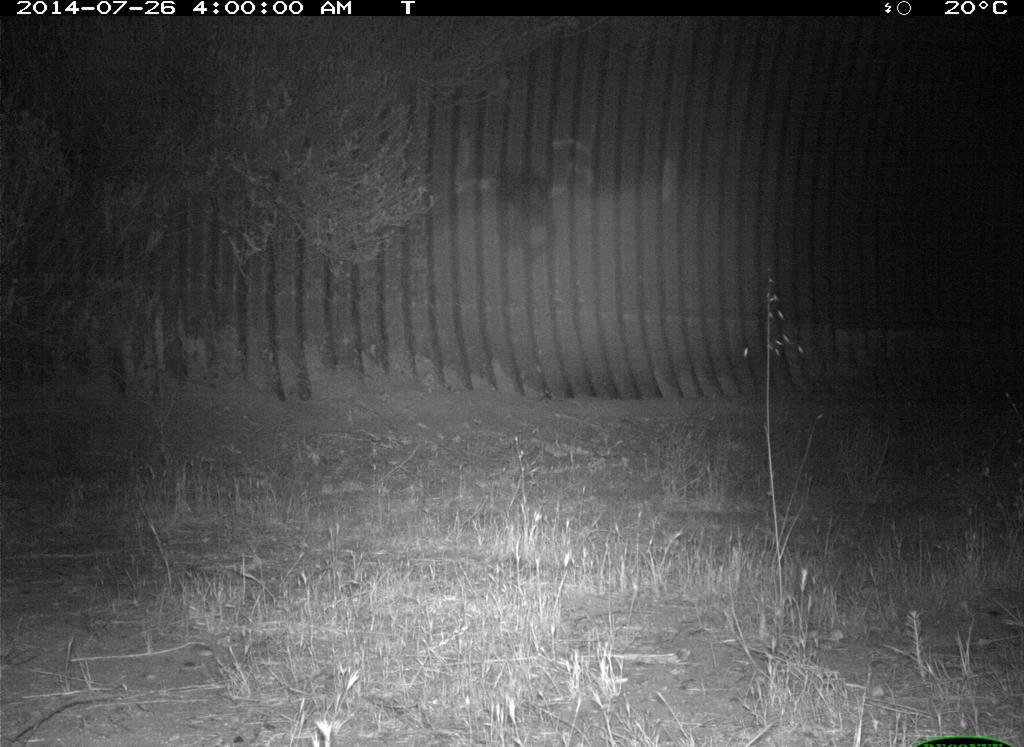

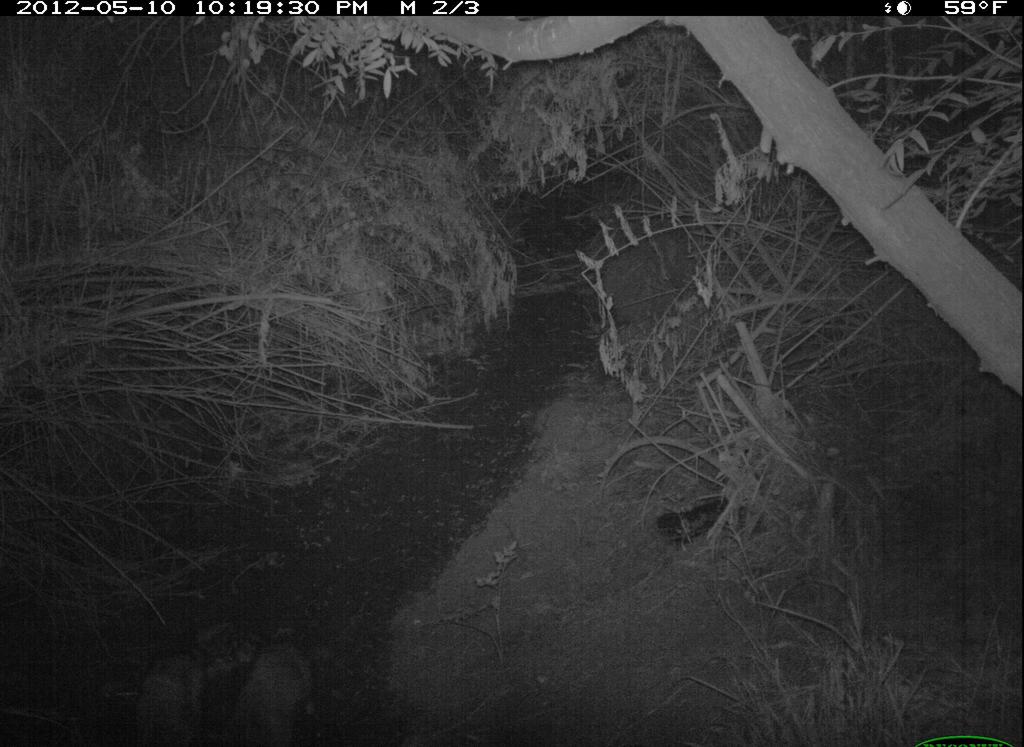

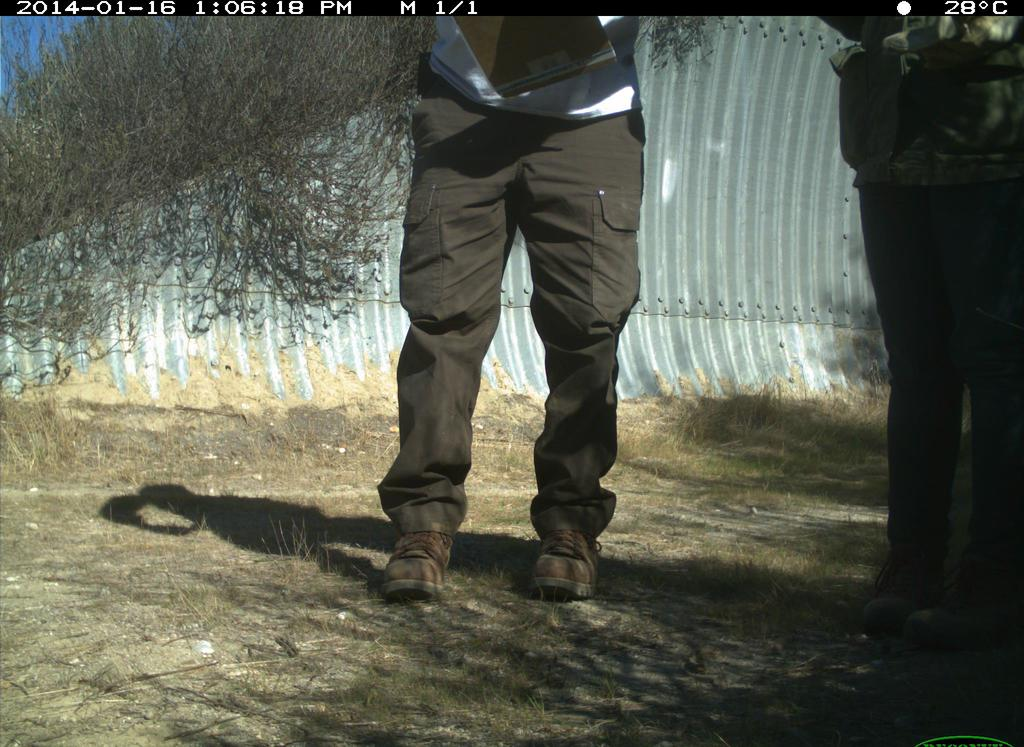

In [8]:
#inspecting image
for n in range(3):
  image_path = random.choice(all_image_paths) #imported the random
  display.display(display.Image(image_path))
  print()

In [9]:
#determine the label for each iamge -> did this before but improving
all_image_labels=[i for i in id]
all_image_labels[:10]

[19, 19, 0, 0, 0, 3, 8, 0, 0, 0]

In [10]:
#load and format the image
img_path=all_image_paths[0] #to load and process image
img_path

'../input/train_images/5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg'

In [11]:
img_raw=tf.io.read_file(img_path)
print(repr(img_raw)[:100] + "...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [12]:
#decode it into an image tensor
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(747, 1024, 3)
<dtype: 'uint8'>


In [13]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
0.99586856


In [14]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [15]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

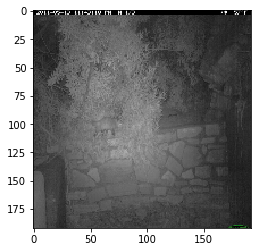

In [17]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path)) #load/preprocess
plt.grid(False) #no grid line 
print()

In [18]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [19]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [20]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

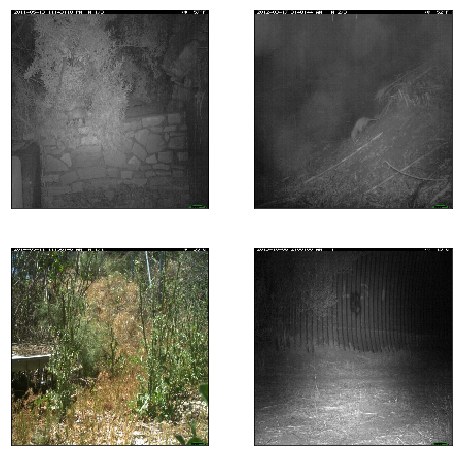

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #plt.xlabel(caption_image(all_image_paths[n]))
  print()

In [26]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [28]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [29]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=10) #image_count is too big to run
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds
#NONE=sample size

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [30]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=10))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [31]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 0s 0us/step


In [32]:
def change_range(image,label):
  return 2*image-1, label

keras_ds = ds.map(change_range)

In [33]:
image_batch, label_batch = next(iter(keras_ds))

In [34]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)
#mobilenet에 apply

(32, 6, 6, 1280)


In [36]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(23)])

In [37]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: -3.415577
max logit: 3.6608448

Shape: (32, 23)


In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [39]:
len(model.trainable_variables)

2

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 23)                29463     
Total params: 2,287,447
Trainable params: 29,463
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

6135.0

In [43]:
model.fit(ds, epochs=2, steps_per_epoch=5)

Epoch 1/2
5/5 [==============================] - 12s 2s/step - loss: 4.1828 - accuracy: 0.6375
Epoch 2/2
5/5 [==============================] - 12s 2s/step - loss: 5.5876 - accuracy: 0.6438
